# K - Means
- Unsupervised

**What is clustering?**

- **Objective**: group physical or obstruct objects into similar **object classes**
- It is a task **NOT SUPERVISED** $ \rightarrow $ we do not know a priori how to classify our objects
- It is a task **NOT COMPLETELY DEFINED** $ \rightarrow $ How do we quantify the performance of a clustering result?
- What definition of **similarity** do we establish?

**Examples of clustering applications**

- Taxonomies in biology, groupings by biological similarity, or even genetic (big data !!)
- Similar pages to structure search results (eg Searching for "movie" might return results grouped by similar descriptions.
- Segmentation of clients or users by a defined similarity criterion.

<img src='https://miro.medium.com/max/1017/1*vNng_oOsNRHKrlh3pjSAyA.png'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import metrics
%matplotlib inline

In [2]:
def experiment_number_of_clusters(X, clustering, show_metric=True,
                                  plot_data=True, plot_centers=True, plot_boundaries=False):
    plt.figure(figsize=(15,6))
    for n_clusters in range(2,10):
        clustering.n_clusters = n_clusters
        y = clustering.fit_predict(X)

        cm = plt.cm.plasma
        plt.subplot(2,4,n_clusters-1)

        plot_cluster_predictions(clustering, X, n_clusters, cm, 
                                 plot_data, plot_centers, show_metric)
        
def plot_cluster_predictions(clustering, X, n_clusters = None, cmap = plt.cm.plasma,
                             plot_data=True, plot_centers=True, show_metric=False,
                             title_str=""):

    assert not hasattr(clustering, "n_clusters") or \
           (hasattr(clustering, "n_clusters") and n_clusters is not None), "must specify `n_clusters` for "+str(clustering)

    if n_clusters is not None:
        clustering.n_clusters = n_clusters

    y = clustering.fit_predict(X)
    # remove elements tagged as noise (cluster nb<0)
    X = X[y>=0]
    y = y[y>=0]

    if n_clusters is None:
        n_clusters = len(np.unique(y))

    if plot_data:        
        plt.scatter(X[:,0], X[:,1], color=cmap((y*255./(n_clusters-1)).astype(int)), alpha=.5)
    if plot_centers and hasattr(clustering, "cluster_centers_"):
        plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=150,  lw=3,
                    facecolor=cmap((np.arange(n_clusters)*255./(n_clusters-1)).astype(int)),
                    edgecolor="black")   

    if show_metric:
        if hasattr(clustering, 'inertia_'):
          inertia = clustering.inertia_
        else:
          inertia = 0
        sc = silhouette_score(X, y) if len(np.unique(y))>1 else 0
        plt.title("n_clusters %d, inertia=%.0f sc=%.3f"%(n_clusters, inertia, sc)+title_str)
    else:
        plt.title("n_clusters %d"%n_clusters+title_str)

    plt.axis("off")
    return

In [3]:
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 3000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[3, 3], [-2, -1], [2, -5],[0,0]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.3 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [4]:
X, y = make_blobs(n_samples=3000, centers=[[3,3], [-2, -1], [2, -5], [0, 0]], cluster_std=0.3)

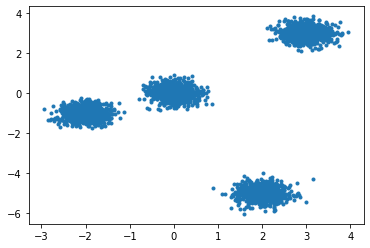

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds.</li>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [6]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [7]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 3, 2, ..., 2, 3, 3])

In [9]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 2.99546455e+00,  2.99227217e+00],
       [-1.30897174e-03,  6.31697613e-03],
       [ 1.98973157e+00, -4.99866564e+00],
       [-2.01960670e+00, -1.00127735e+00]])

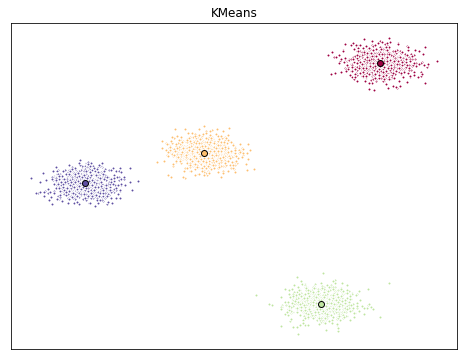

In [10]:
fig = plt.figure(figsize=(8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[3,3], [-2, -1], [2, -5], [0, 0]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

### Customer Dataset

In [11]:
df = pd.read_csv("../Datasets/Week9/Cust_Segmentation.csv")
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2

In [12]:
# We don't need qualitative data
df = df.drop('Address', axis=1) 
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2

In [13]:
# Normalizing 
# We use StandardScaler() to normalize our dataset
X = df.values[:,1:]
X = np.nan_to_num(X)
N_df = StandardScaler().fit_transform(X)
N_df

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [14]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 0 0 2 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 2 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 2 0 1 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2
 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 1 0 2 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 

In [15]:
df["Clus_km"] = labels
df.head(5)

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  Clus_km  
0        0.0              6.3        0  
1        0.0             12.8        1  
2        1.0             20.9        0  
3        0.0              6.3        0  
4        0.0              7.2        2

In [16]:
df.groupby('Clus_km').mean()

Customer Id        Age       Edu  Years Employed      Income  \
Clus_km                                                                 
0         432.468413  32.964561  1.614792        6.374422   31.164869   
1         402.295082  41.333333  1.956284       15.256831   83.928962   
2         410.166667  45.388889  2.666667       19.555556  227.166667   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Clus_km                                                     
0         1.032541    2.104133   0.285185        10.094761  
1         3.103639    5.765279   0.171233        10.724590  
2         5.678444   10.907167   0.285714         7.322222

C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


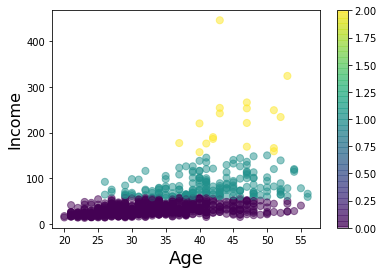

In [17]:
#area = np.pi * ( X[:, 1])**2  
#plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), marker="p", alpha=0.5)
#plt.xlabel('Age', fontsize=18)
#plt.ylabel('Income', fontsize=16)
#plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X[:, 0], X[:, 3],c=labels.astype(np.float),s=50, alpha=0.5)

ax.set_xlabel('Age', fontsize=18)
ax.set_ylabel('Income', fontsize=16)
plt.colorbar(scatter)

fig.show()


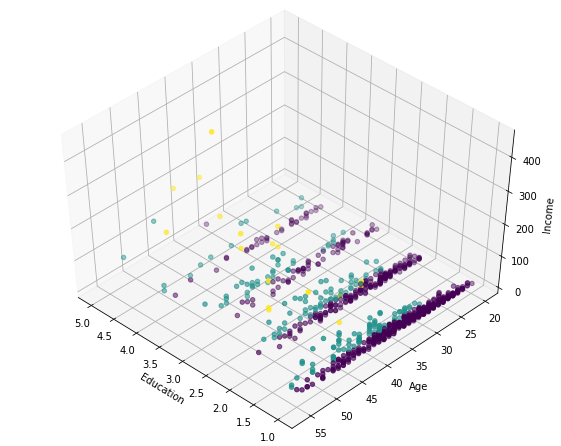

In [18]:

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

# Other Example

## Intuition

What groups would you do with the following data? What would the process be like?

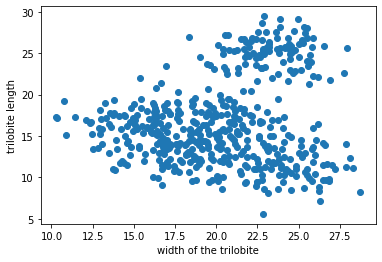

In [19]:
X = pd.read_csv("../Datasets/Week9/cluster1.csv").values+15

plt.scatter (X [:, 0], X [:, 1])
plt.xlabel ("width of the trilobite")
plt.ylabel ("trilobite length");

## Centroid-based methods - KMeans

The k-means (or k-means) algorithm is a grouping method that assumes that clusters are represented by a prototype that corresponds to the centroid of the data set. It is an iterative algorithm that in each iteration assigns the elements to the closest centroid and recalculates the centroids according to the newly assigned elements.

In [20]:
from IPython.display import IFrame
IFrame('https://www.youtube.com/embed/BVFG7fd1H30', width="560", height="315")


Pseudo code

     Entry:
         X: data
         k: number of desired clusters
        
     Algorithm:
         1. select k centroids randomly
         2. repeat until the k centroids do not change:
         3. establish k clusters assigned each data to the closest centroid
         4. recalculates the centroid of each cluster as the average of the data

The following code applies the k-means algorithm to a data set. Since it is an unsupervised model, the `fit` function receives only the input data as its argument, not the labels. The `predict` function assigns clusters to examples, both training clusters and new examples.

In [21]:
X = pd.read_csv("../Datasets/Week9/cluster1.csv").values+15
n_clusters = 2
km = KMeans( n_clusters=n_clusters)
km.fit(X)
y = km.predict(X)

In [22]:
pd.Series(y).value_counts()

0    392
1    108
dtype: int64

The coordinates of the centroids can be obtained with `cluster_centers`:

In [23]:
km.cluster_centers_

array([[19.5061742 , 14.31526768],
       [23.01615594, 24.85357474]])

The following code draws the grouped data along with the centroids:

Text(0, 0.5, 'largo del trilobite')

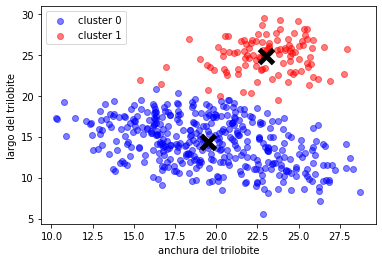

In [24]:

cmap = plt.cm.plasma

cmap((y*255./(n_clusters-1)).astype(int))
for i in np.unique(y):
    cmap = plt.cm.bwr
    col = cmap((i*255./(n_clusters-1)).astype(int))
    Xr = X[y==i]
    plt.scatter(Xr[:,0], Xr[:,1], color=col, label="cluster %d"%i, alpha=.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
plt.legend()    
plt.xlabel("anchura del trilobite")
plt.ylabel("largo del trilobite")

In [25]:
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

The `experiment_number_of_clusters` function (defined at the beginning of the notebook) shows results with different number of clusters:

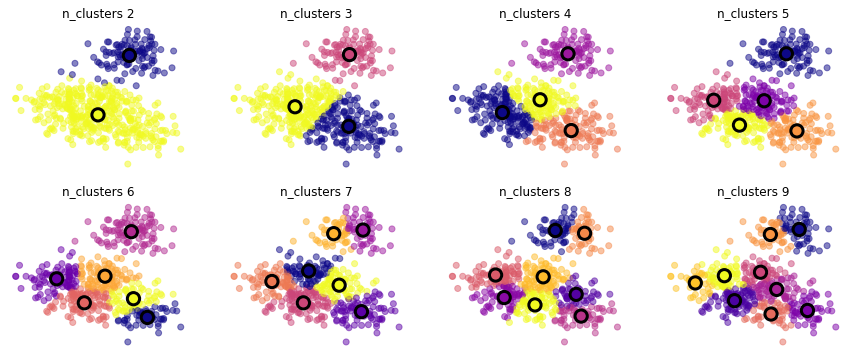

In [26]:
X = pd.read_csv("../Datasets/Week9/cluster1.csv").values

experiment_number_of_clusters(X, KMeans(), show_metric=False)

### Experiment with different synthetic datasets

- Change `cluster_std` and` centers` in `make_blobs` to generate datasets with different distributions
- What is the number of _natural_ clusters that you would use? why is it _natural_?

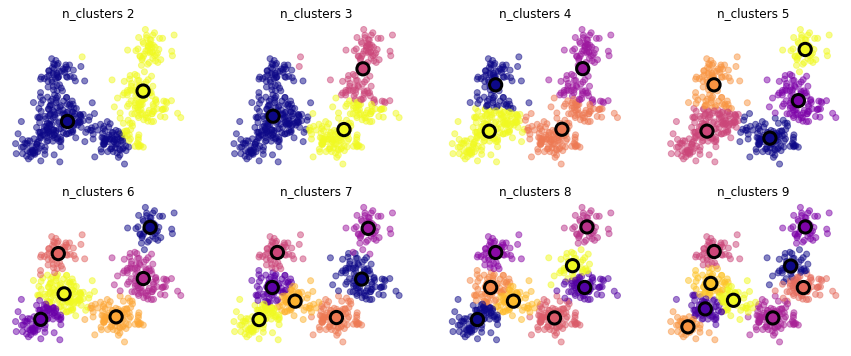

In [27]:
X,_ = make_blobs(500, cluster_std=1.5, centers=10)
experiment_number_of_clusters(X, KMeans(), show_metric=False)

## How to select the number of clusters?

For this we need to use an objective measure of the quality of a clustering. These measures are defined in the package [`sklearn.metrics.cluster`](http://scikit-learn.org/stable/modules/classes.html#clustering-metrics). Some measures are supervised and others are not supervised:
* **Supervised measures**: use the actual labels in the examples to analyze the correspondence between clusters and classes.
* **Unsupervised measurements**: calculate measurements based on intra-cluster and / or inter-cluster distances.

### Inertia or intra-cluster distance

The intra-cluster distance measures how compact each cluster is and is defined as:

$$ \sum_{i = 0}^{n} \min_{\mu_j \in C} (|| x_i - \mu_j || ^ 2) $$

k-means minimizes this measure, which makes it a good candidate for evaluating the quality of a cluster. For this we execute k-means with different values ​​of k and graph the value of inertia. In this graph we look for a value of k that is as small as possible and that has a low metric value. This type of graph is usually known as an elbow graph:

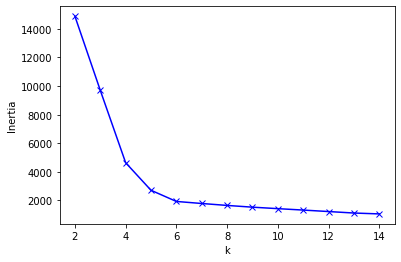

In [28]:
X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)

Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

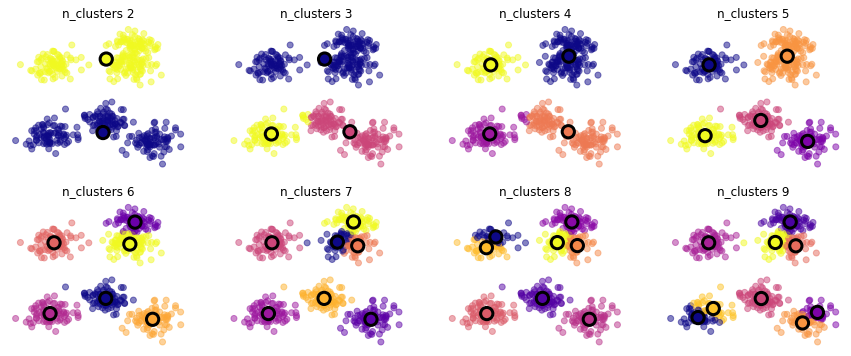

In [29]:
experiment_number_of_clusters(X, KMeans(), show_metric=False)

However, the inertia or sum of intra-cluster distance has several problems:
* Inertia assumes that clusters are convex and isotropic, which is not always the case. Responds poorly to elongated, or multiple groups with irregular shapes.
* Inertia is not a standard metric: we only know that lower values are better and that zero is optimal.

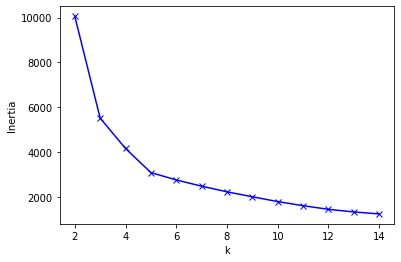

In [30]:
X = pd.read_csv("../Datasets/Week9/cluster1.csv").values
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

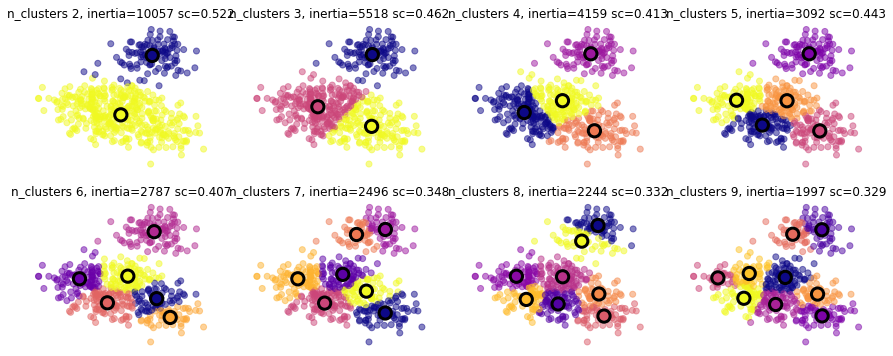

In [31]:
X = pd.read_csv("../Datasets/Week9/cluster1.csv").values
experiment_number_of_clusters(X, KMeans(), show_metric=True)

### Silhouette coefficient

The silhouette coefficient combines the mean intra-cluster distance ($ a $) and the mean distance to the closest group ($ b $) for each sample:
$$ \frac {b - a} {\max (a, b)} $$

It is a measure that is between -1 and 1. A value close to 1 indicates that the inter-cluster distance is much larger than the intra-cluster distance.

In [32]:
silhouette_scores = []

X,_ = make_blobs(500, cluster_std=1.5, centers=6, random_state=10)

K = range(2,15)

for k in K:
    
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X, y))

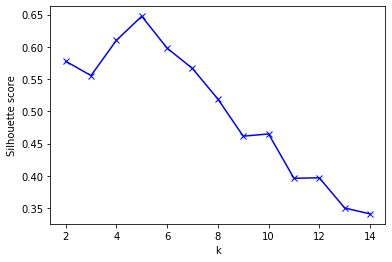

In [33]:
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

In contrast to the inertia diagram where we look for the elbow of the graph, here we look for the maximum value. Which in this case is 5. For the second data set we have:

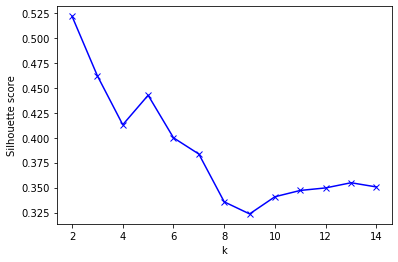

In [34]:
X = pd.read_csv("../Datasets/Week9/cluster1.csv").values
silhouette_scores = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X, y))
    
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

# Iris Dataset

In [35]:
iris = datasets.load_iris()
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = iris.target
x.head()

Sepal Length  Sepal Width  Petal Length  Petal Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0, 0.5, 'Petal Width')

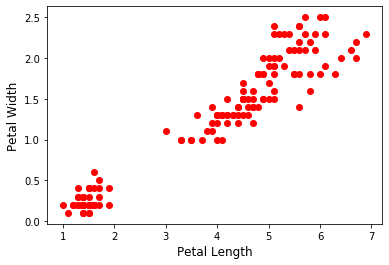

In [37]:
plt.scatter(x['Petal Length'], x['Petal Width'], color='red')
plt.xlabel('Petal Length', fontsize = 12)
plt.ylabel('Petal Width', fontsize = 12)

Text(0, 0.5, 'Petal Width')

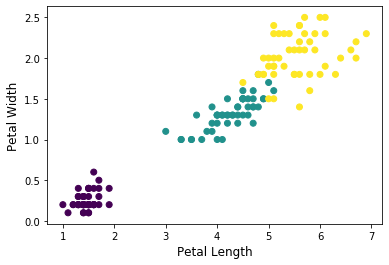

In [38]:
plt.scatter(x['Petal Length'], x['Petal Width'], c=y)
plt.xlabel('Petal Length', fontsize = 12)
plt.ylabel('Petal Width', fontsize = 12)

We can see two groups, so let's try divide into $2$ clusters

In [39]:
classifier = KMeans(n_clusters=2, max_iter=1000)
classifier.fit(x)
labels = classifier.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
y_kmeans = classifier.predict(x)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


Text(0, 0.5, 'Petal Width')

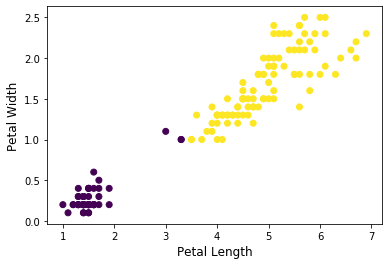

In [41]:
plt.scatter(x['Petal Length'], x['Petal Width'], c=y_kmeans)
plt.xlabel('Petal Length', fontsize = 12)
plt.ylabel('Petal Width', fontsize = 12)

In [42]:
acc = metrics.adjusted_rand_score(y, y_kmeans)
acc

0.5399218294207123

Our actual accuracy is not good.

now let's try divide into $3$ cluster

In [43]:
classifier = KMeans(n_clusters=3, max_iter=1000)
classifier.fit(x)
labels = classifier.labels_

In [44]:
y_kmeans = classifier.predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Text(0, 0.5, 'Petal Width')

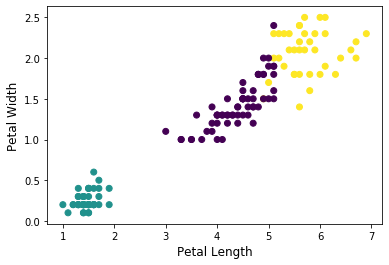

In [45]:
plt.scatter(x['Petal Length'], x['Petal Width'], c=y_kmeans)
plt.xlabel('Petal Length', fontsize = 12)
plt.ylabel('Petal Width', fontsize = 12)

In [46]:
acc = metrics.adjusted_rand_score(y, y_kmeans)
acc

0.7302382722834697

#### $0.73\%$ Much Better !

but can we obtain a better result?

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
0.7302382722834697


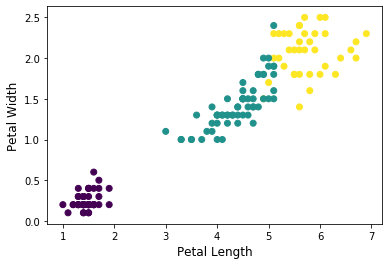

In [47]:
classifier = KMeans(init='k-means++', n_init=20, n_clusters=3, max_iter=500,n_jobs=5,random_state=3, tol=0.00001)
classifier.fit(x)
labels = classifier.labels_
y_kmeans = classifier.predict(x)
print(y_kmeans)
plt.scatter(x['Petal Length'], x['Petal Width'], c=y_kmeans)
plt.xlabel('Petal Length', fontsize = 12)
plt.ylabel('Petal Width', fontsize = 12)
acc = metrics.adjusted_rand_score(y, y_kmeans)
print(acc)


to find it We use elbow method to see what happens with our model

<img src="https://www.oreilly.com/library/view/numerical-computing-with/9781789953633/assets/f54e236e-f441-43d6-80a9-07feef4f6ef4.png">

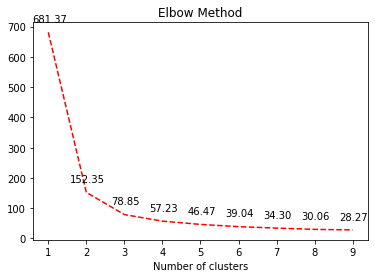

In [48]:
def elbowmethod(x):
    '''
    x = Our data frame
    '''
    elbow = []
    for i in range(1, 10):
        kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
        kmeans.fit(x)
        elbow.append(kmeans.inertia_)

    plt.plot(range(1, 10), elbow, 'r--')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    for x,y in zip(range(1, 10),elbow):
        label = "{:.2f}".format(y)
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(1,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    plt.show()
    

elbowmethod(x)

How we can see $3$ is the best **n_clusters**

## Now we'll work with wines dataset 

In [49]:
wines = datasets.load_wine()
x = pd.DataFrame(wines.data, columns=wines.feature_names)
y = wines.target
x.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [50]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

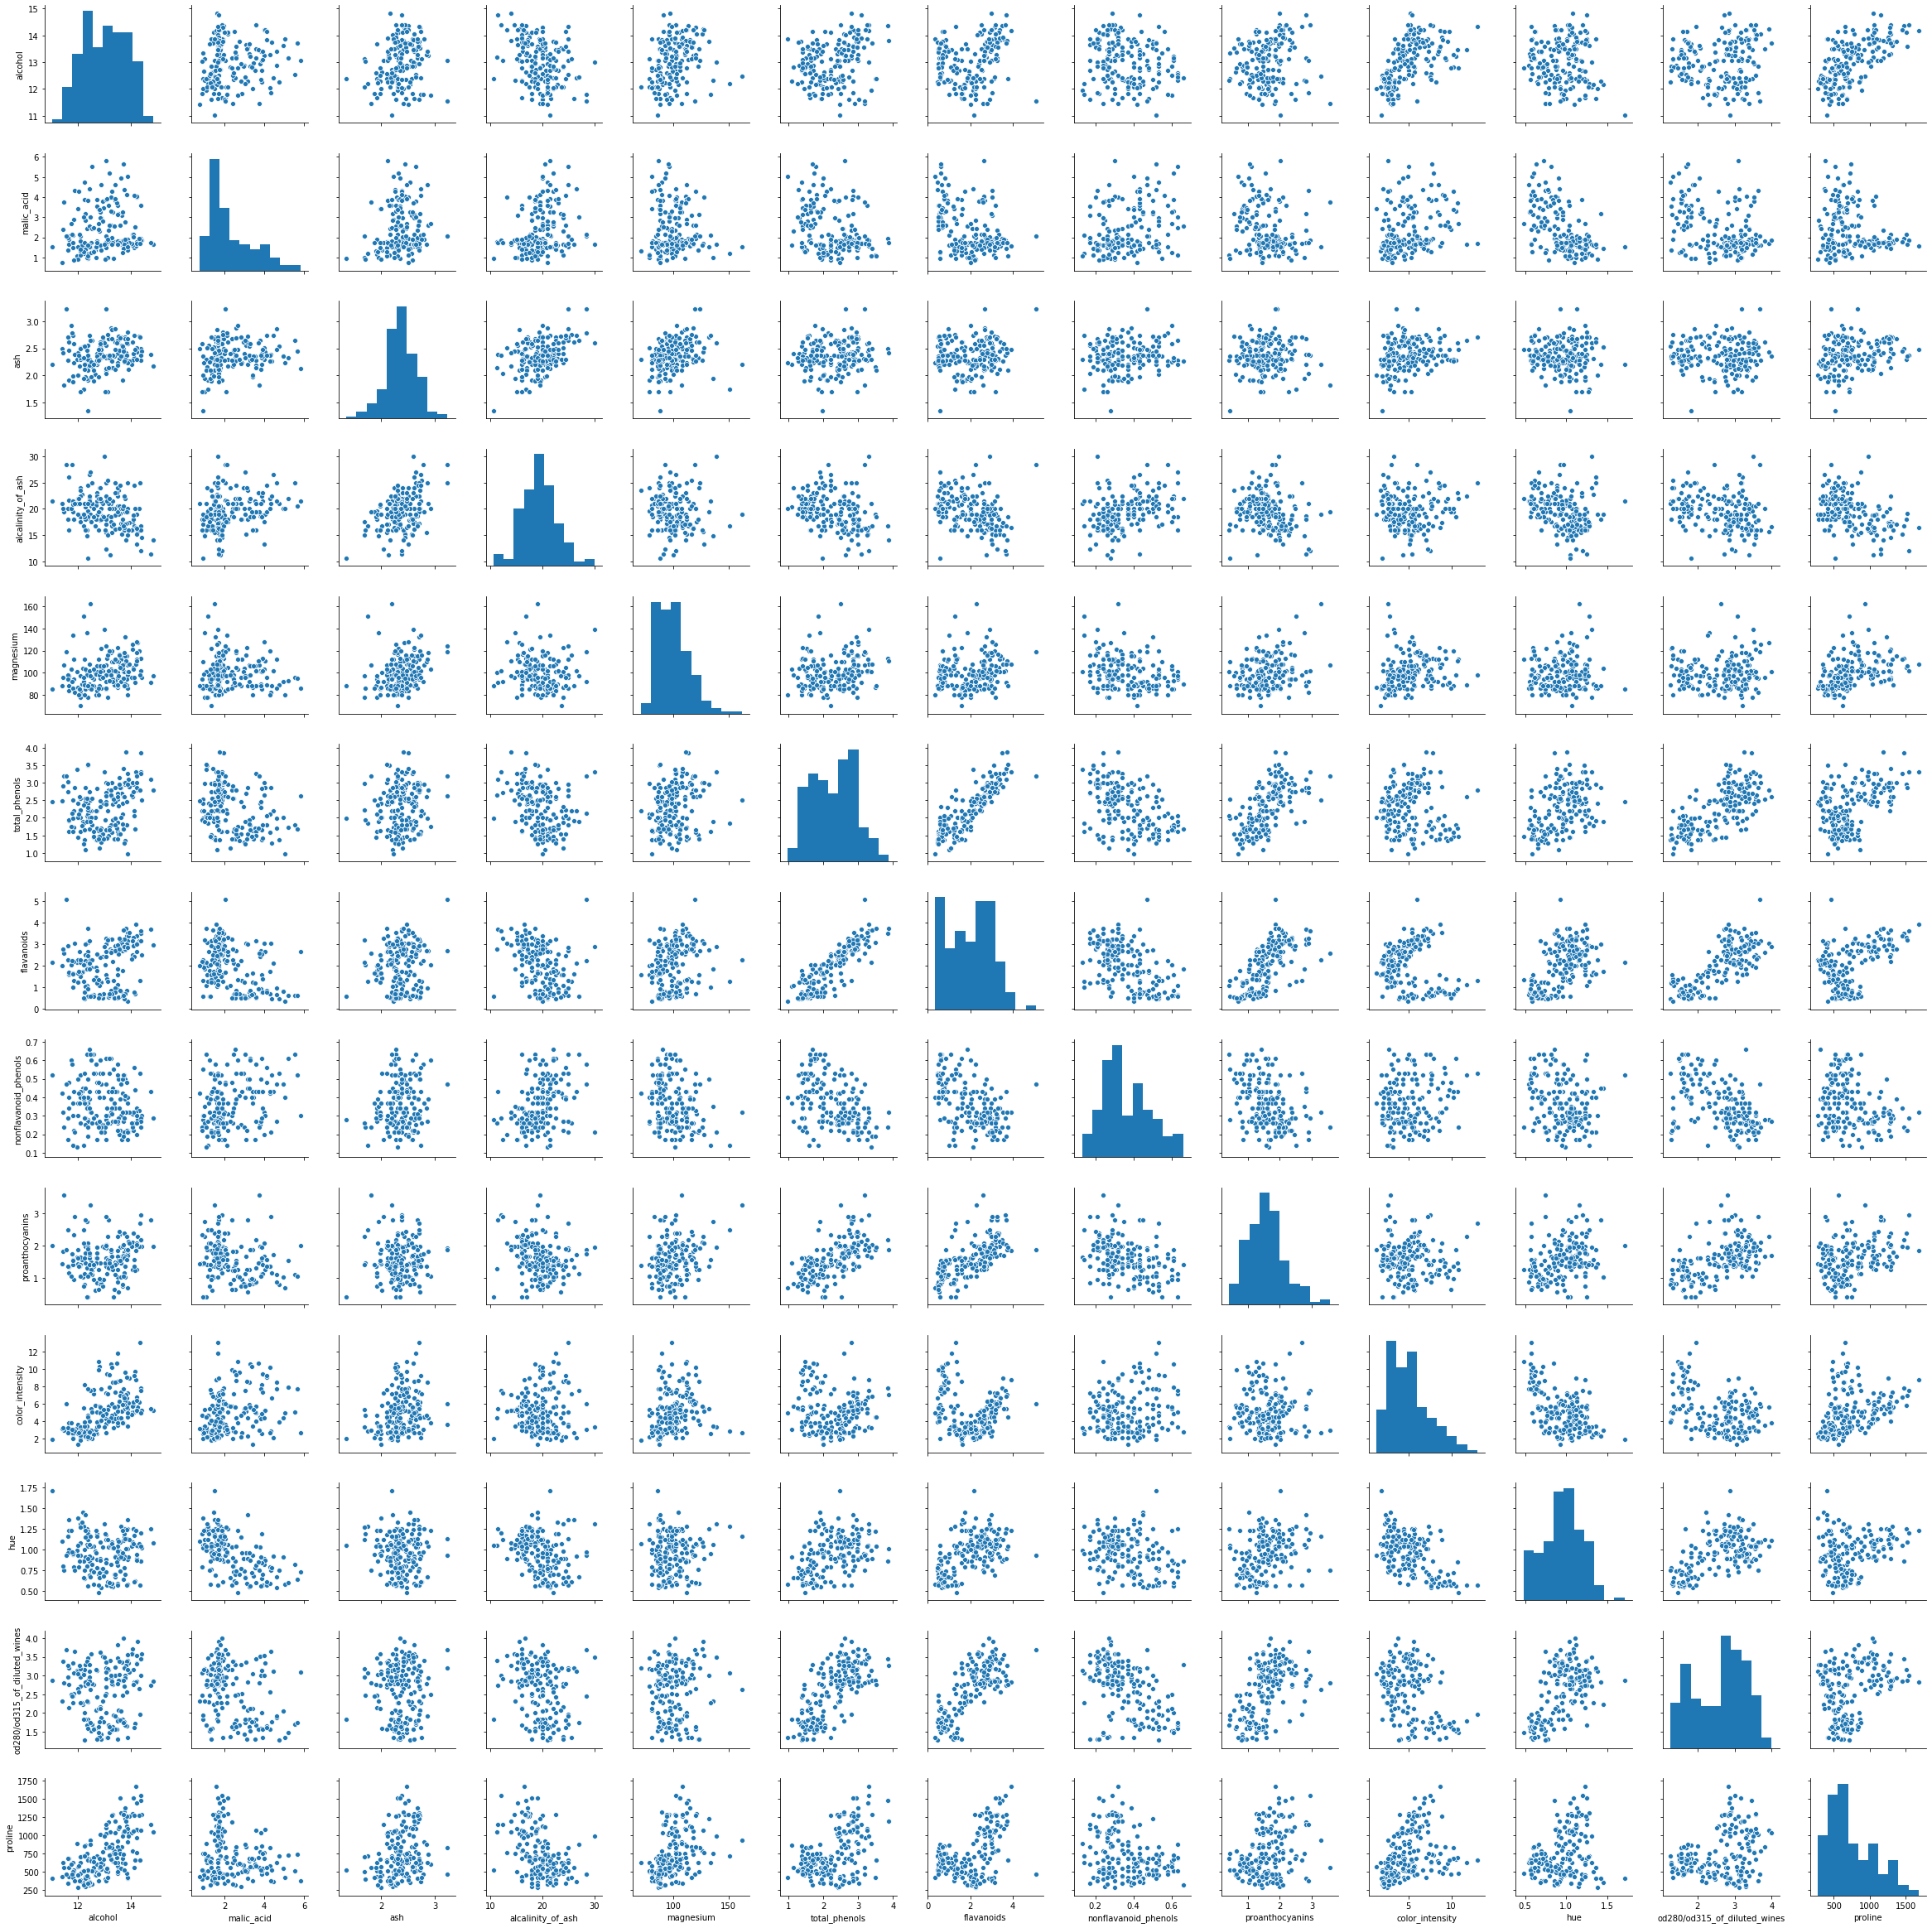

In [51]:
sns.pairplot(x)

In [52]:
corr = x.corr()
corr

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315_of_diluted_wines         0.519067        -0.428815  0.565468   
proline                              0.330417         0.316100  0.236183   

                              od280/od315_of_diluted_wines   prol

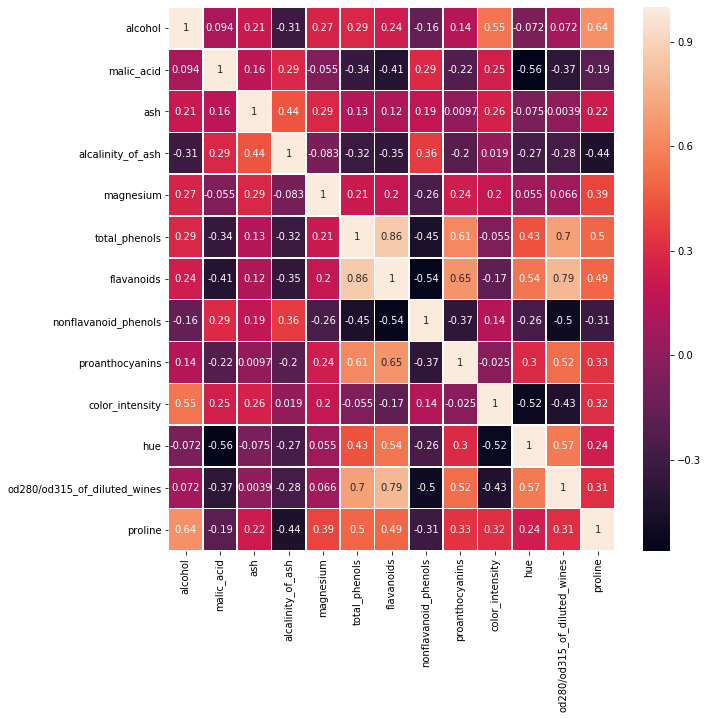

In [53]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
ax.autoscale(enable=True) # To fix scale 

Our best correlation is **malic_acid** with **Alcohol**

Text(0, 0.5, 'malic_acid')

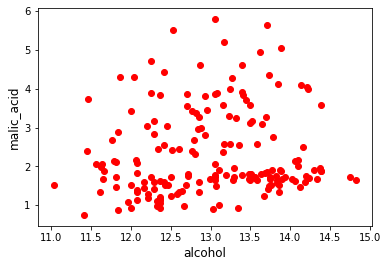

In [54]:
plt.scatter(x['alcohol'], x['malic_acid'], color='red')
plt.xlabel('alcohol', fontsize = 12)
plt.ylabel('malic_acid', fontsize = 12)

Text(0, 0.5, 'malic_acid')

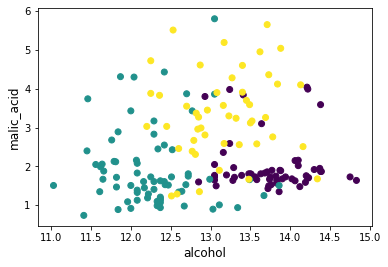

In [55]:
plt.scatter(x['alcohol'], x['malic_acid'], c=y)
plt.xlabel('alcohol', fontsize = 12)
plt.ylabel('malic_acid', fontsize = 12)

In [56]:
classifier = KMeans(n_clusters=2, max_iter=1000)
classifier.fit(x)
labels = classifier.labels_

In [57]:
y_kmeans = classifier.predict(x)
print(y_kmeans)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Text(0, 0.5, 'malic_acid')

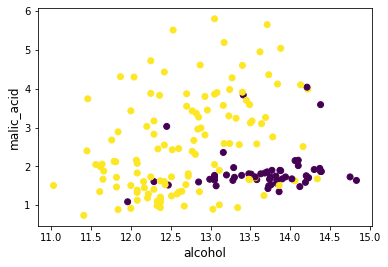

In [58]:
plt.scatter(x['alcohol'], x['malic_acid'], c=y_kmeans)
plt.xlabel('alcohol', fontsize = 12)
plt.ylabel('malic_acid', fontsize = 12)

In [59]:
acc = metrics.adjusted_rand_score(y, y_kmeans)
acc

0.3694075388574537

Very bad model

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


Text(0, 0.5, 'malic_acid')

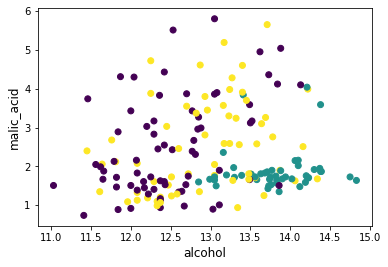

In [60]:
classifier = KMeans(n_clusters=3, max_iter=1000)
classifier.fit(x)
y_kmeans = classifier.predict(x)
print(y_kmeans)
plt.scatter(x['alcohol'], x['malic_acid'], c=y_kmeans)
plt.xlabel('alcohol', fontsize = 12)
plt.ylabel('malic_acid', fontsize = 12)

In [61]:
acc = metrics.adjusted_rand_score(y, y_kmeans)
acc

0.37111371823084754

### Accuracy measurement 

In [62]:
iterations = range(10)
test_iters = []

for i in iterations:
    classifier = KMeans(n_clusters=i+1, max_iter=1000)
    classifier.fit(x)
    y_kmeans = classifier.predict(x)
    acc = metrics.adjusted_rand_score(y, y_kmeans)
    test_iters.append(acc)

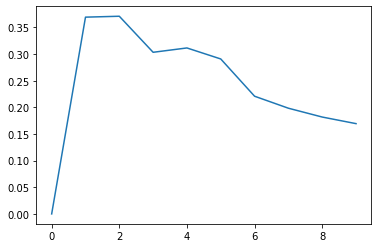

In [63]:
plt.plot(iterations, test_iters)

## Other Dataset

In [64]:
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

In [65]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

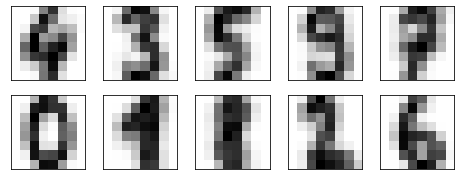

In [66]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [67]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

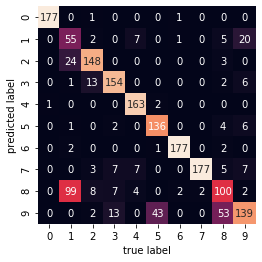

In [69]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
fig, ax = plt.subplots()
sns.heatmap(mat.T, square=True, annot=True, fmt='g', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
ax.autoscale(enable=True) # To fix scale 
plt.xlabel('true label')
plt.ylabel('predicted label');

We can use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing k-means. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters. Let's see how it does:

In [70]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9326655537006121

### Color Compression

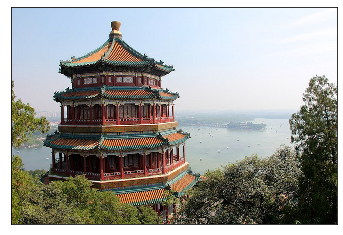

In [71]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [72]:
china.shape

(427, 640, 3)

In [73]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [74]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

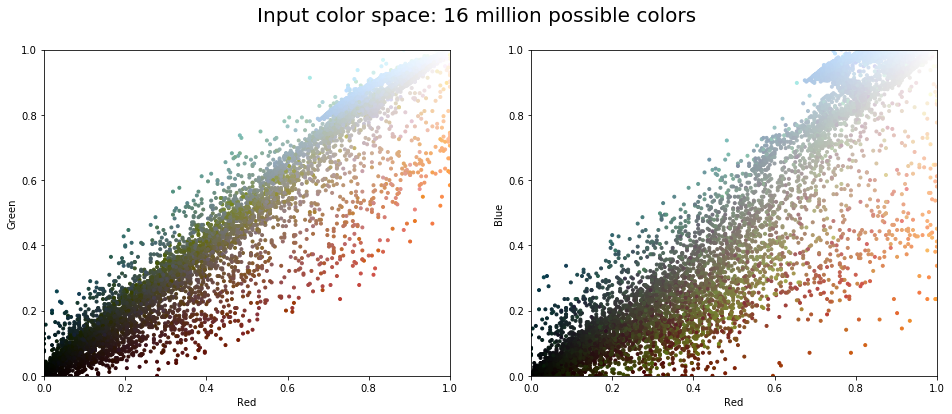

In [75]:
plot_pixels(data, title='Input color space: 16 million possible colors')

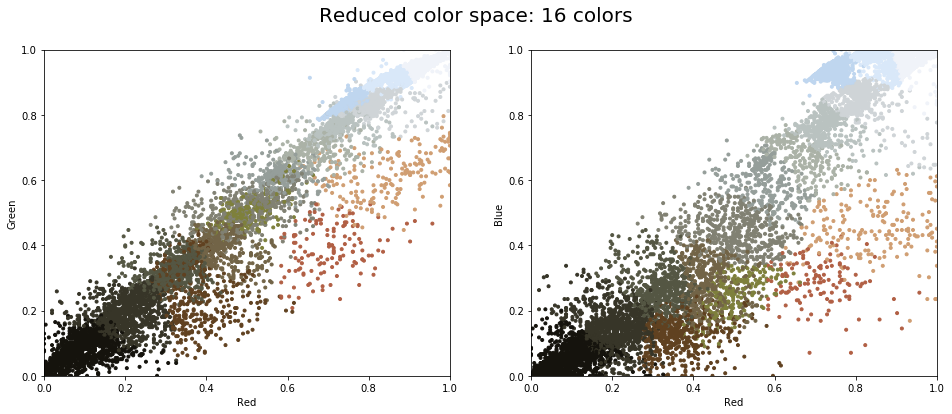

In [76]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

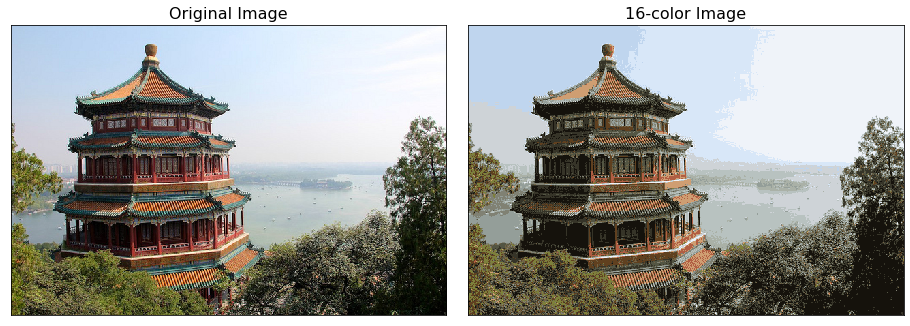

In [77]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

### Other Example

In [78]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [79]:
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())

***** Train_Set *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [80]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

***** Train_Set *****
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


***** Test_Set *****
       PassengerId      Pclass      

In [81]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [82]:
train.isna().head()


PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False

In [83]:
test.isna().head()

PassengerId  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  \
0        False   False  False  False  False  False  False   False  False   
1        False   False  False  False  False  False  False   False  False   
2        False   False  False  False  False  False  False   False  False   
3        False   False  False  False  False  False  False   False  False   
4        False   False  False  False  False  False  False   False  False   

   Cabin  Embarked  
0   True     False  
1   True     False  
2   True     False  
3   True     False  
4   True     False

In [84]:
print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
print(test.isna().sum())

*****In the train set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*****In the test set*****
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [85]:
train.fillna(train.mean(), inplace=True)

In [86]:
test.fillna(test.mean(), inplace=True)


In [87]:
print(train.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [88]:
print(test.isna().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [89]:
train['Ticket'].head()


0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [90]:
train['Cabin'].head()


0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [91]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [92]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


Sex  Survived
0  female  0.742038
1    male  0.188908

In [93]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

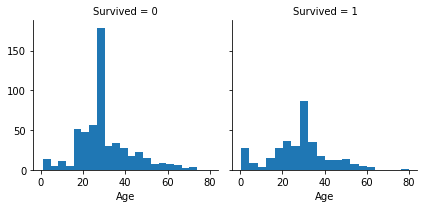

In [94]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

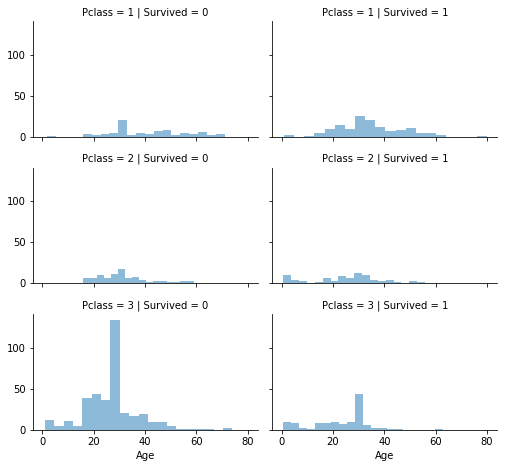

In [95]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [96]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

In [98]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

In [99]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [100]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.4 KB


In [101]:
X = np.array(train.drop(['Survived'], 1).astype(float))


In [102]:
y = np.array(train['Survived'])


In [103]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [104]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.5084175084175084


### Mini Batch K-Means

### About Datset

1. Chocolate: Does it contain chocolate? fruity: Do you have any fruit flavoring? 
2. caramel: Is there a presence of caramel in the candy? 
3. peanutalmondy: Does it contain peanuts, peanut butter or almonds? 
4. Nougat: Do you have nougat? 
5. crispedricewafer: Does it contain puffed rice, wafers or cookies in its components? 
6. hard: Is it of hard texture? 
7. bar: Does it come in the form of a bar? 
8. Pluribus: Is it an individual treat or are there many in a bag or box? 
9. sugarpercent: The sugar percentile that falls within the same dataset. 
10. pricepercent: The price percentile per unit it is in with respect to the dataset. 
11. winpercent: Winning percentage according to 269,000 random pairings.

In [105]:
from sklearn.cluster import MiniBatchKMeans

In [106]:
df = pd.read_csv('../Datasets/Week9/candy.csv')
df.head()

competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
3   46.116505  
4   52.341465

In [107]:
x = df.drop(['competitorname'],1)

MKM = MiniBatchKMeans(n_clusters=4, batch_size=8).fit(x)
print(len(MKM.cluster_centers_))


4


In [108]:
df['group_pred'] = MKM.predict(x)
df.head()

competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  group_pred  
0   66.971725           1  
1   67.602936           1  
2   32.261086           0  
3   46.116505           2  
4   52.341465           2

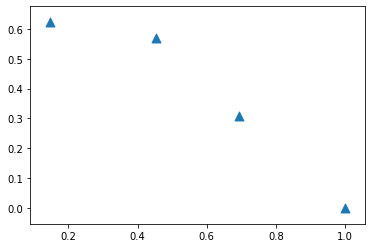

In [109]:
plt.scatter(MKM.cluster_centers_[:,0], MKM.cluster_centers_[:,1], marker='^', s=80)

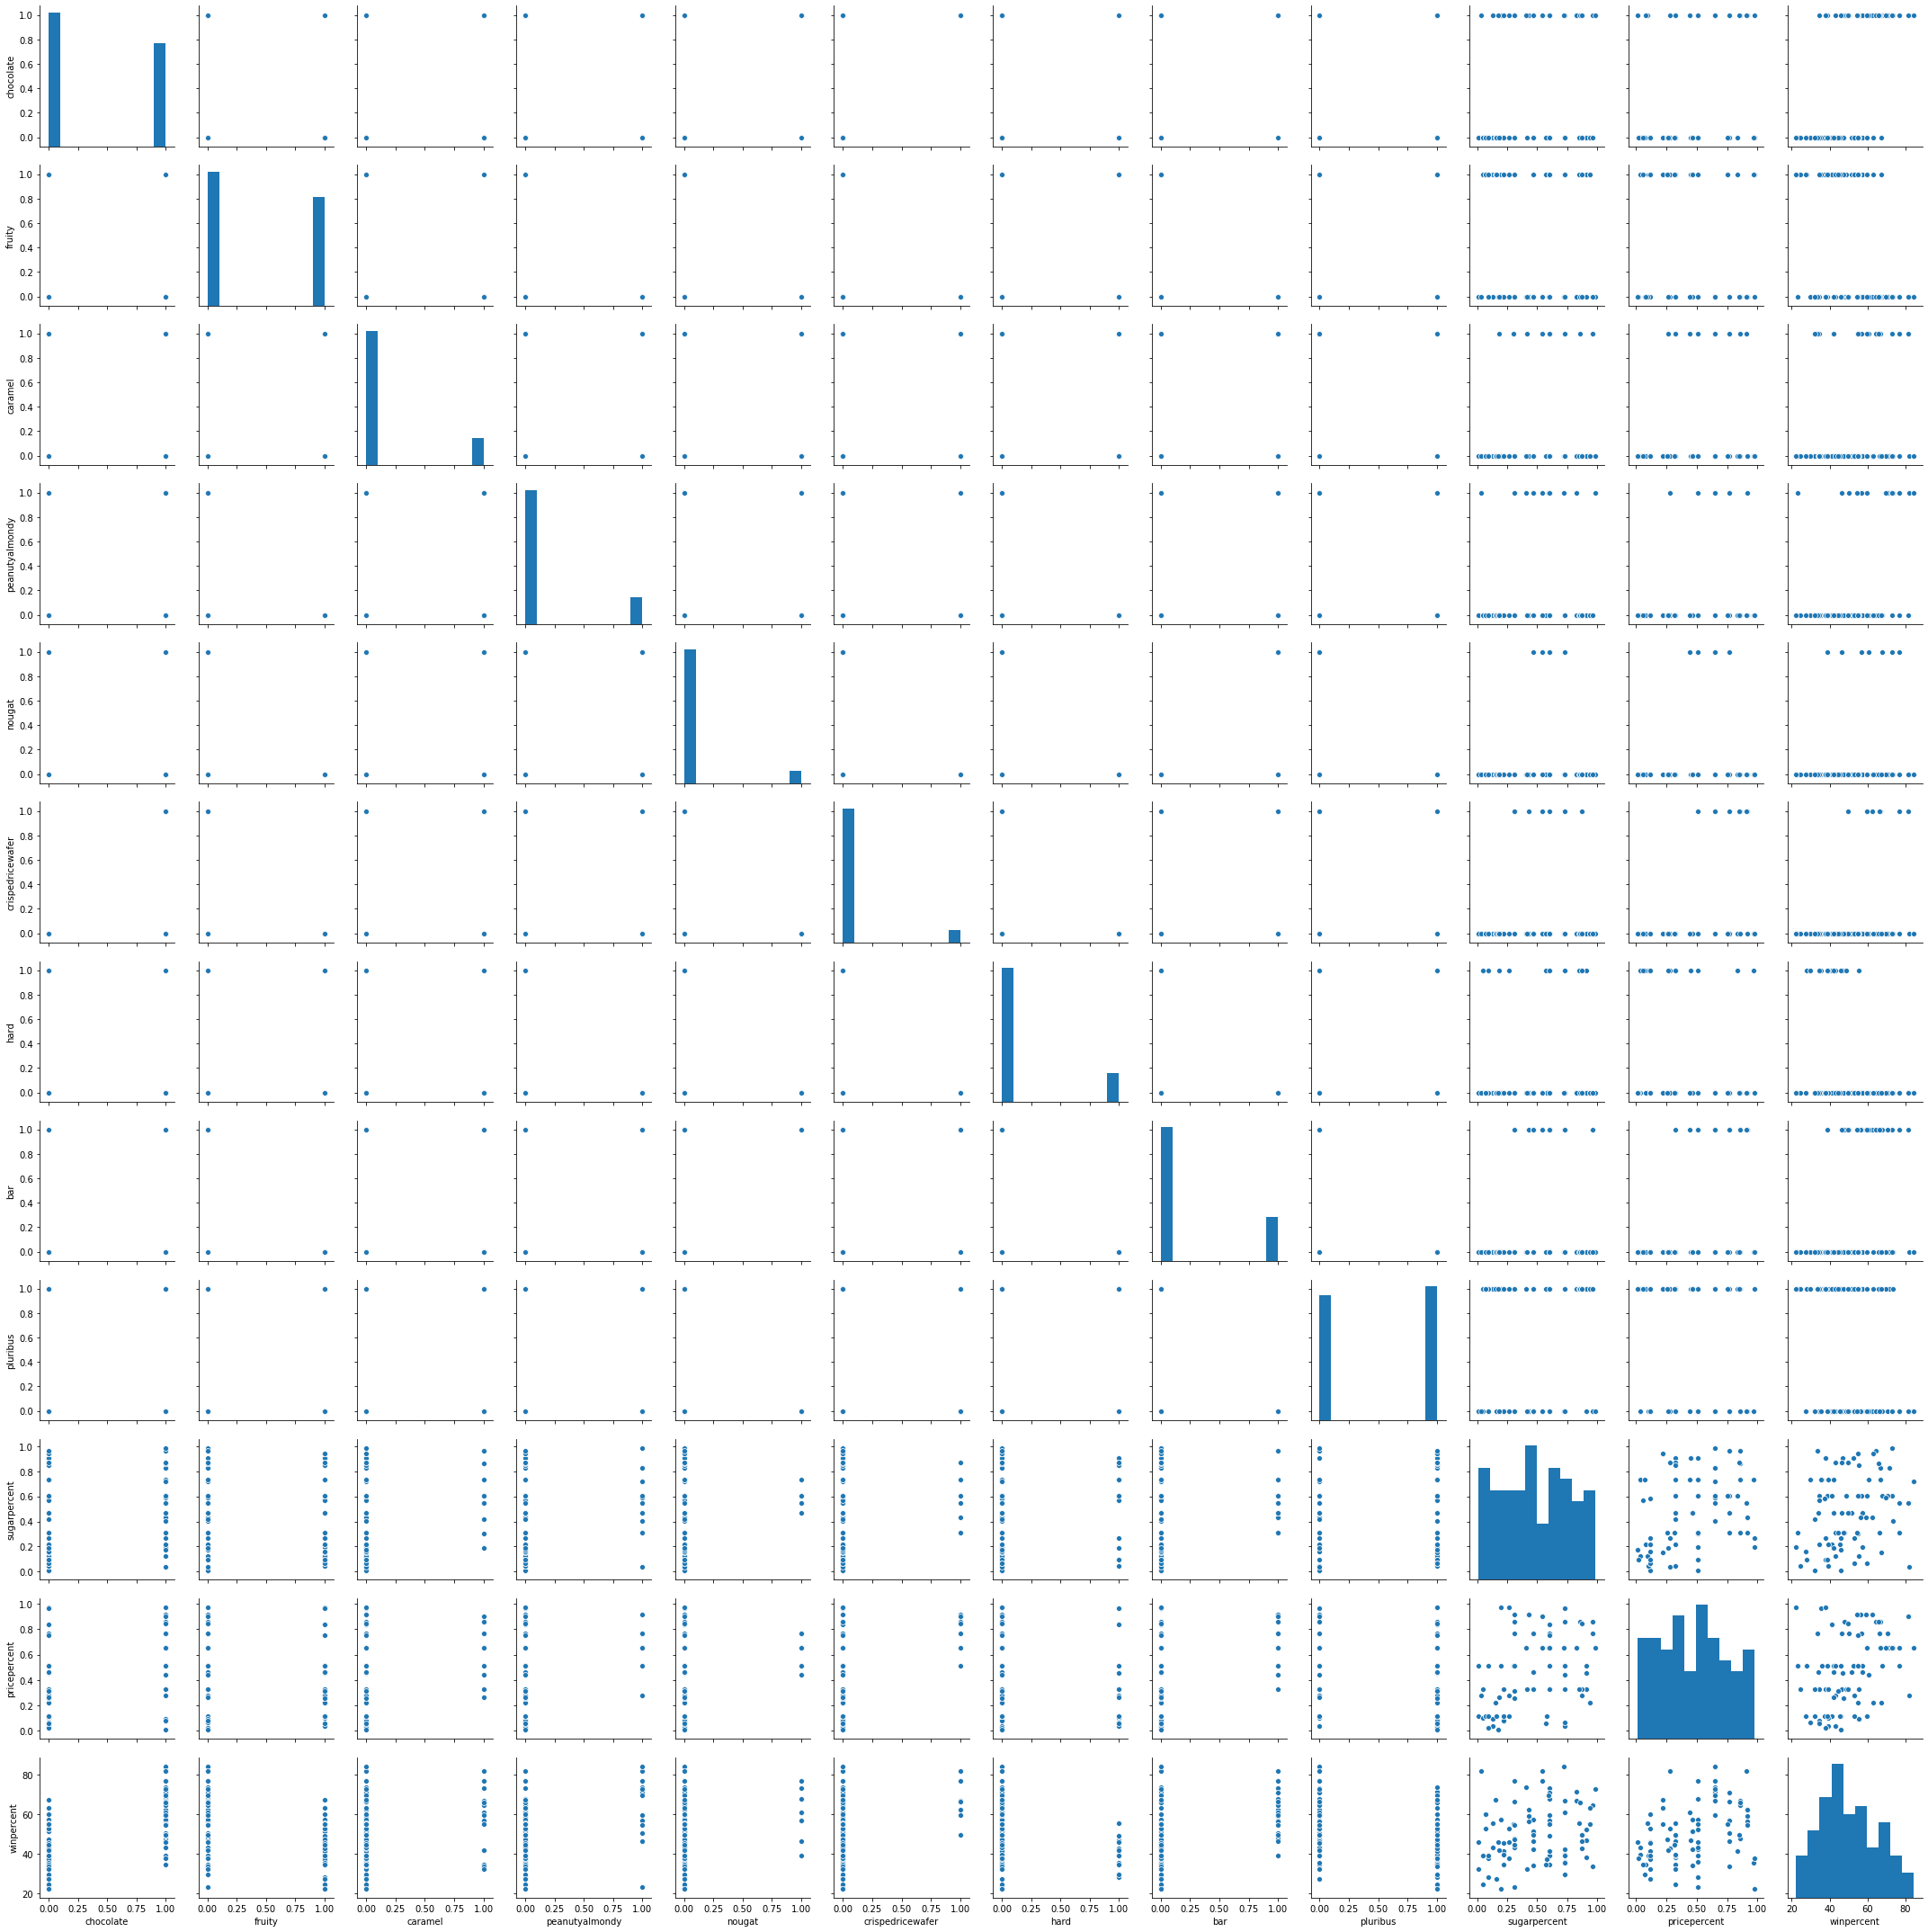

In [110]:
sns.pairplot(x)

### Mean-Shift

In [111]:
from sklearn.cluster import MeanShift

In [112]:
MS = MeanShift().fit(x)
print(MS.labels_)

[2 2 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 2 1 2 0 1 2 0 0 1 2 2 0 1 2
 2 2 1 1 1 2 2 0 0 0 2 0 0 0 2 2 2 2 0 2 0 0 0 2 1 0 0 2 2 2 1 2 0 0 0 0 1
 1 0 0 1 1 2 0 0 0 0 1]


In [113]:
df['meanshit'] = MS.predict(x)
df.head()

competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  group_pred  meanshit  
0   66.971725           1         2  
1   67.602936           1         2  
2   32.261086           0         0  
3   46.116505           2         0  
4   52.341465           2         1